# CSCE-509 Pattern Recognition - Assignment I
Gabriel C. Trahan - C00058009



---

## Contents:
* [Part 0: Data Creation](#part-0-data-creation)
    * [A: Generate Dataset](#0a-generate-dataset)
    * [B: Plot Dataset](#0b-plot-dataset)
* [Part 1: Perceptron](#part-1-perceptron)
    * [A: Dataset Preparation](#a-dataset-preparation)
    * [B: Perceptron Initialization/Implementation](#b-perceptron-initializationimplementation)
    * [C: 4-Fold Cross Validation](#c-4-fold-cross-validation--metrics)
* [Part 2: Linear SVM](#part-2-linear-svm)
    * [A: Linear SVM with Small C Parameter](#a-linear-svm-with-small--parameter)
    * [B: Linear SVM with Large C Parameter](#b-linear-svm-with-large--parameter)
* [Part 3: Non-linear SVM](#part-3-non-linear-svm)
    * [A: Non-Linear SVM with Small C Parameter](#a-non-linear-svm-with-small--parameter)
    * [B: Non_Linear SVM with Large C Parameter](#b-non-linear-svm-with-large--parameter)
    * [C: Non-Linear SVM with Reasonable C Parameter](#c-non-linear-svm-with-reasonable--parameter)
* Part 4: Mismatch Between Training & Test Data
* Part 5: High Variance

---

## Part 0: Data Creation

* [A: Generate Dataset](#a-generate-dataset)
* [B: Plot Dataset](#b-plot-dataset)

### A: Generate Dataset
* $Class_0$: Uniformly distributed in the (union of) 3 squares: $[-1, 0]~x~[-1, 0] + [-1, 0]~x~[0, 1] + [0, 1]~x~[-1, 0]$
* $Class_1$: Gaussian distributed centered at $(0.5, 0.5)$, with variance $(0.5, 0.5)$
* Generate 150 points in $Class_0$ and 50 points in $Class_1$.

In [181]:
"""Generate dataset."""

from numpy              import ndarray, vstack
from numpy.random       import normal, uniform

# Generate Class 0:
class_0:    ndarray =   vstack([
                            # Square 1: [-1, 0] x [-1, 0] x 50
                            uniform(low = [-1, -1], high = [0, 0], size = (50, 2)),
                            
                            # Square 2: [-1, 0] x [0, 1] x 50
                            uniform(low = [-1, 0],  high = [0, 1], size = (50, 2)),
                            
                            # Square 3: [0, 1] x [-1, 0] x 50
                            uniform(low = [0, -1],  high = [1, 0], size = (50, 2))
                        ])

# Verify shape of Class 0.
print(f"Class 0 shape: {class_0.shape}")

# Generate Class 1: 50 data points normally distributed around [0.5, 0.5], with variance [0.5, 0.5]
class_1:    ndarray =   normal(loc = [0.5, 0.5], scale = [0.5, 0.5], size = (50, 2))

# Verify shape of Class 1.
print(f"Class 1 shape: {class_1.shape}")

Class 0 shape: (150, 2)
Class 1 shape: (50, 2)


### B: Plot Dataset

* Plot the points in both classes, using a different color & shape for each class.

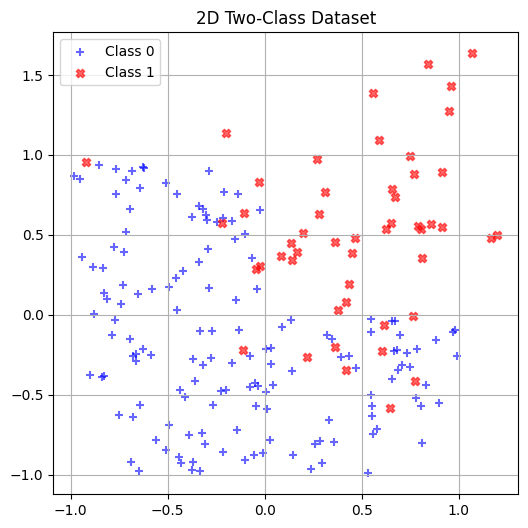

In [ ]:
"""Generate dataset."""

from matplotlib.pyplot  import figure, grid, legend, scatter, show, title

# Initialize figure.
figure(figsize = (6, 6))

# Plot Class 0.
scatter(class_0[:, 0], class_0[:, 1], color = "blue", marker = "+", label = "Class 0", alpha = 0.6)

# Plot Class 1.
scatter(class_1[:, 0], class_1[:, 1], color = "red",  marker = "X", label = "Class 1", alpha = 0.6)

# Define title.
title("2D Two-Class Dataset")

# Generate legend.
legend()

# Enable grid lines for distribution validation.
grid(visible = True)

# Display plot.
show()

---

## Part 1: Perceptron

* [A: Dataset Preparation](#a-dataset-preparation)
* [B: Perceptron Initialization/Implementation](#b-perceptron-initializationimplementation)
* [C: 4-Fold Cross Validaiton & Metrics](#c-4-fold-cross-validation--metrics)

### A: Dataset Preparation

* Use a test set of 50 points from Class 0 and 50 points from Class 1 to evaluate the performance of the classifier.

In [183]:
"""Prepare dataset."""

from numpy          import concatenate, ones
from numpy.random   import permutation

# Generate class targets.
class_0_targets:    ndarray =       -ones(shape = 50)
class_1_targets:    ndarray =        ones(shape = 50)

# Create shuffled index for Class 0.
shuffle:            ndarray =       permutation(150)

# Shuffle Class 0.
class_0:            ndarray =       class_0[shuffle]

# Concatenate datasets into 1 for training (50 from each class).
x_data:             ndarray =       concatenate((class_0[:50], class_1), axis = 0)

# Verify shape of X.
print(f"X-data shape: {x_data.shape}")

# Concatenate targets into 1 for training (50 from each class).
y_data:             ndarray =       concatenate((class_0_targets[:50], class_1_targets))

# Verify shape of targets.
print(f"Y-data shape: {y_data.shape}")

# Create shuffled index.
shuffle:            ndarray =       permutation(100)

# Rearrange samples and targets according to shuffle.
x_data, y_data =                    x_data[shuffle], y_data[shuffle]

# Print dataset components for validation.
print(f"\nSamples: {x_data}")
print(f"Targets: {y_data}")

X-data shape: (100, 2)
Y-data shape: (100,)

Samples: [[-0.32582504 -0.73848741]
 [ 0.26957896  0.97434988]
 [-0.04866331 -0.42825848]
 [-0.33633745  0.67917675]
 [ 0.78877847  0.55391247]
 [-0.13281825 -0.09728832]
 [-0.2902292   0.40791468]
 [ 0.55573761  1.38553639]
 [-0.28837526  0.89668799]
 [ 1.19844589  0.49792035]
 [-0.43535645 -0.46860846]
 [ 0.83950364  1.56885571]
 [-0.69276225  0.66327752]
 [ 1.16433768  0.48102863]
 [ 0.19709497  0.50937326]
 [ 0.59037438  1.09294936]
 [ 0.67366797  0.73407803]
 [ 0.13394711  0.44851439]
 [-0.04370184 -0.56976137]
 [ 0.60544663 -0.22947108]
 [ 0.36246263  0.45774595]
 [ 0.91171882  0.89524749]
 [-0.11198371 -0.2180677 ]
 [ 0.54725781 -0.02579693]
 [-0.02743945  0.83057126]
 [-0.69611084 -0.14916759]
 [ 0.76658981 -0.01118918]
 [ 0.62337658  0.53377971]
 [-0.31712792 -0.31757695]
 [ 0.37931871  0.02861533]
 [-0.02383232  0.30312649]
 [-0.76560123  0.75251954]
 [-0.50723515 -0.84866185]
 [ 0.78614464 -0.217551  ]
 [ 0.64456055 -0.581917  ]
 

### B: Perceptron Initialization/Implementation

* Implement a Perceptron classifier to separate the two classes (generated in the previous section).

In [184]:
"""Initialize & fit perceptron."""

from sklearn.linear_model   import Perceptron

# Initialize perceptron.
classifier:         Perceptron =    Perceptron()

# Fit data to perceptron.
classifier.fit(X = x_data, y = y_data)

# Print solution contrived by classifier.
print(f"""Solution: ({classifier.coef_[0][0]:.2f})x_0 + ({classifier.coef_[0][1]:.2f})x_1 + {classifier.intercept_[0]} = 0  (over {classifier.n_iter_:.2f} iterations)""")

Solution: (0.92)x_0 + (2.37)x_1 + 0.0 = 0  (over 8.00 iterations)


### C: 4-Fold Cross Validation & Metrics

* Use 4-fold cross validation to report the accuracy, precision, recall, & AUROC metrics. Report the variance of the accuracy across 4 runs.

In [185]:
"""Evaluate perceptron on 4-fold cross validation."""

from numpy                      import var
from sklearn.metrics            import roc_auc_score
from sklearn.model_selection    import cross_val_predict, cross_val_score, KFold

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Calculate metrics.
accuracy:   list =  cross_val_score(estimator = classifier, X = x_data, y = y_data, cv = fold, scoring = "accuracy")
precision:  list =  cross_val_score(estimator = classifier, X = x_data, y = y_data, cv = fold, scoring = "precision")
recall:     list =  cross_val_score(estimator = classifier, X = x_data, y = y_data, cv = fold, scoring = "recall")
aur_roc:    float = roc_auc_score(y_true = y_data, y_score = cross_val_predict(estimator = classifier, X = x_data, y = y_data, cv = fold))

# Calculate and print metrics.
print("\nCross Validation Results:")
print("-------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {accuracy[0]:^10.2f} | {accuracy[1]:^10.2f} | {accuracy[2]:^10.2f} | {accuracy[3]:^10.2f} |""")
print(f"""{"Precision":10} | {precision[0]:^10.2f} | {precision[1]:^10.2f} | {precision[2]:^10.2f} | {precision[3]:^10.2f} |""")
print(f"""{"Recall":10} | {recall[0]:^10.2f} | {recall[1]:^10.2f} | {recall[2]:^10.2f} | {recall[3]:^10.2f} |""")
print(f"""\nAUROC:       {aur_roc:.3}""")
print(f"""Variance     {var(accuracy):.3f}""")


Cross Validation Results:
-------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.60    |    0.84    |    0.80    |    0.92    |
Precision  |    1.00    |    1.00    |    1.00    |    0.71    |
Recall     |    1.00    |    0.88    |    0.55    |    0.40    |

AUROC:       0.75
Variance     0.014


---

## Part 2: Linear SVM

* [A: Linear SVM with Small C Parameter](#a-linear-svm-with-small--parameter)
* [B: Linear SVM with Large C Parameter](#b-linear-svm-with-large--parameter)

### A: Linear SVM with Small $C$ Parameter

Repeat [Part 1](#part-1-perceptron) with a very ***small** $C$ hyperparameter.

### B: Linear SVM with Large $C$ Parameter

Repeat [Part 1](#part-1-perceptron) with a very ***large** $C$ hyperparameter.

---

## Part 3: Non-Linear SVM

* [A: Non-Linear SVM with Small C Parameter](#a-non-linear-svm-with-small--parameter)
* [B: Non_Linear SVM with Large C Parameter](#b-non-linear-svm-with-large--parameter)
* [C: Non-Linear SVM with Reasonable C Parameter](#c-non-linear-svm-with-reasonable--parameter)

### A: Non-Linear SVM with Small $C$ Parameter

* Repeat [Part 1](#part-1-perceptron) with a Non-Linear SVM, using a very ***small*** $C$ hyperparameter.

### B: Non-Linear SVM with Large $C$ Parameter

* Repeat [Part 1](#part-1-perceptron) with a Non-Linear SVM, using a very ***large*** $C$ hyperparameter.

### C: Non-Linear SVM with Reasonable $C$ Parameter

* Increase the Class 1 variance to $[1.5, 1.5]$. Plot the data. Repeat [Part 1](#part-1-perceptron) with a reasonable choice of $C$.

---

## Part 4: Mismatch Between Training & Test Data

### A: 

---